# Travail personnel d'analyse numérique: 
## Module 6 - Physique Statistique

Marine VILARIÑO FOSTIER

Rossen DIMITROV

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## Random Numbers

### Challenge 1:
###### Compare the output of the built-in exponential and Gaussian generators with the versions implemented in the module.

Let's start with the exponential generator. Let's first check the exponential function, starting with the one we implemented:


C:\Users\Rossen\Anaconda3b\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


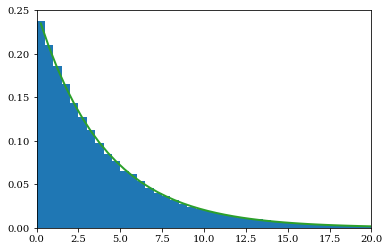

In [2]:
# Number of random numbers to draw
N = 100000 

# Rate of the exponential distribution
alpha = 0.25

# Exponential distribution
x = np.random.random_sample(N)
y = -1/alpha*np.log(1-x)

# Plot the histogram
binwidth = 0.5
plt.xlim(0, 20)
bins = np.arange(0., 21., binwidth)
plt.hist(y, bins, normed = True)

# Compute center of bins
xc = bins[:-1]+binwidth/2

# Plot the expected exponential function
plt.plot(xc, alpha*np.exp(-alpha*xc), linewidth = 2, color = 'C2');

Let us now check the built-in exponential function, taken from the random module:

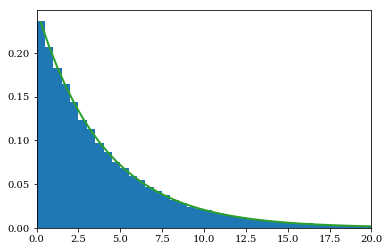

In [3]:
exp1 = []
for i in range(N):
    exp1.append(random.expovariate(alpha))

# Plots
plt.xlim(0, 20)
plt.hist(exp1, bins, normed = True)
plt.plot(xc, alpha*np.exp(-alpha*xc), linewidth = 2, color = 'C2');

We can also use another similar distribution, directly from the numpy module:

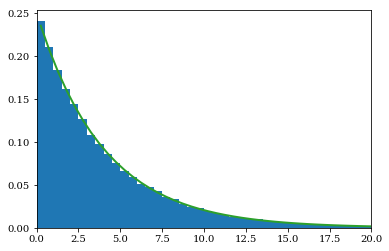

In [4]:
exp2 = np.random.exponential(1/alpha, N)

# Plots
plt.xlim(0, 20)
plt.hist(exp2, bins, normed = True)
plt.plot(xc, alpha*np.exp(-alpha*xc), linewidth = 2, color = 'C2');

As we can see, all three distributions fit pretty well the analytical curve.

Let us now focus on the Gaussian distribution, starting with the implemented in the module, based on the Von Neuman rejection method:

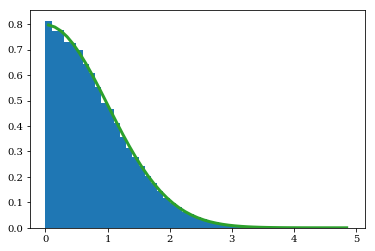

In [5]:
# Distribute g according to the exponential distribution
uniform1 = np.random.random_sample(N)
g = np.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = np.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*np.exp(-g**2/2.0)/np.sqrt(2*np.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = np.random.random_sample(N)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = np.extract(condition,g)



# Plot the histogram
binwidth = 0.1
bins = np.arange(0., 5., binwidth)
plt.hist(h, bins, normed=True);

# Compute bin centers
xc = bins[:-1]+binwidth/2

# Plot the expected gaussian function, with mean 0 and standart derivation 1
plt.plot(xc, 2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi), linewidth=3, color='C2');

We can now check the existing distributions. The random module gives us the gauss function:

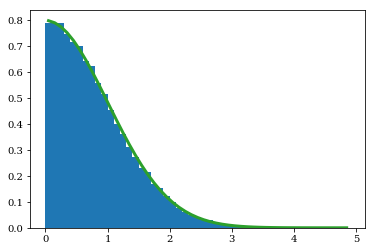

In [6]:
gau1 = []
for i in range(N):
    gau1.append(random.gauss(0,1))
    
# Plots
plt.hist(gau1, bins, normed=True)
plt.plot(xc, 2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi), linewidth=3, color='C2');

As well as the normalvariate function:

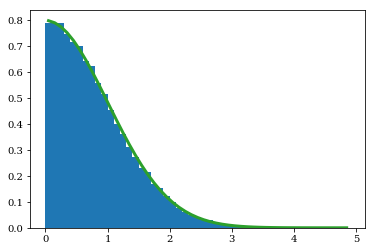

In [7]:
gau2 = []
for i in range(N):
    gau2.append(random.normalvariate(0,1))
    
# Plots
plt.hist(gau1, bins, normed=True)
plt.plot(xc, 2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi), linewidth=3, color='C2');

And again, we can use a normal function from the numpy module.

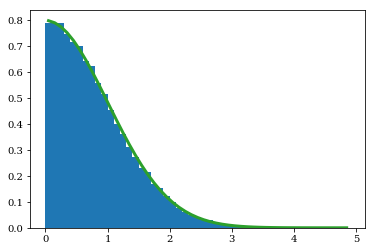

In [8]:
gau3 = np.random.normal(0, 1, N)

# Plots
plt.hist(gau1, bins, normed=True)
plt.plot(xc, 2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi), linewidth=3, color='C2');

Here again, as for the exponential distribution, all tested functions give a satisfying result.

### Challenge 2:

###### Implement the Box-Muller algorithm and verify that it works as expected


The basic form of the Box-Muller method is pretty simple: if $U_1$ and $U_2$ are independent and uniformly distributed on the interval $(0,1)$, then:
$$Z_0 = \sqrt{-2 \ln{U_1}} \cos{(2 \pi U_2)}$$
and
$$Z_1 = \sqrt{-2 \ln{U_1}} \sin{(2 \pi U_2)}$$
are independent random variables with a standart normal distribution.

Let's try to implement this:

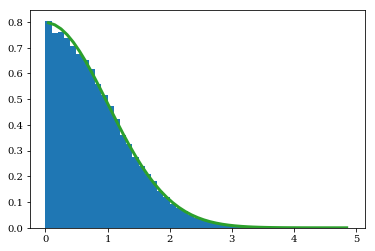

In [9]:
# Number of random numbers to draw
N = 100000

# Box-Muller algorithm
bm = []
for i in range(N//2):
    u1 = np.random.random_sample() # Draw random numbers in (0,1)
    u2 = np.random.random_sample()
    z0 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z1 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    bm.append(z0)
    bm.append(z1)

# Plot the histogram
binwidth = 0.1
bins = np.arange(0., 5., binwidth)
plt.hist(bm, bins, normed='True');

# Compute bin centers
xc = bins[:-1]+binwidth/2

# Plot the expected standart gaussian
plt.plot(xc, 2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi), linewidth=3, color='C2');

It does indeed work as expected!

The Box-Muller algorithm also exists in a polar form: if $u$ and $v$ are independent and uniformly distributed on $[-1,1]$, we set $s = u^2+v^2$. It should be in the interval $(0,1)$, otherwise it is discarded.
Then, 
$$Z_0 = u \sqrt{\frac{-2 \ln s}{s}}$$
and 
$$Z_0 = u \sqrt{\frac{-2 \ln s}{s}}$$
are, here again, independent random variables following a standart normal distribution.

Let's implement this version:

Acceptance ratio =  0.78636


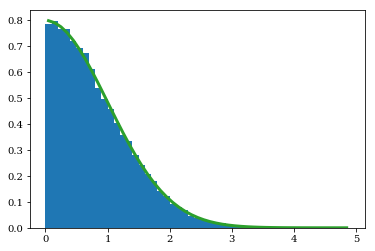

In [10]:
bm_polar = []
for i in range(N//2):
    u1 = np.random.random_sample() # Draw random numbers in (0,1)
    u2 = np.random.random_sample()
    u = 2*u1-1  # Generate random numbers in [-1,1]
    v = 2*u2-1
    s = u**2 + v**2
    if s!=0 and s<1: # Check the condition
        z0 = u*np.sqrt(-2*np.log(s)/s)
        z1 = v*np.sqrt(-2*np.log(s)/s)
        bm_polar.append(z0)
        bm_polar.append(z1)

# Print acceptance ratio
print('Acceptance ratio = ', len(bm_polar)/N)
        
#Plots 
plt.hist(bm_polar, bins, normed=True)
plt.plot(xc, 2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi), linewidth=3, color='C2');

Here again, the distribution fits the expectations pretty well.

## Brownian Motion

### Challenge 1

###### Add a systematic contribution to the displacement, $dx = cdt + \sqrt{2 \alpha dt} \cal{N(0,1)}$,  and analyse the behaviour of the random walk

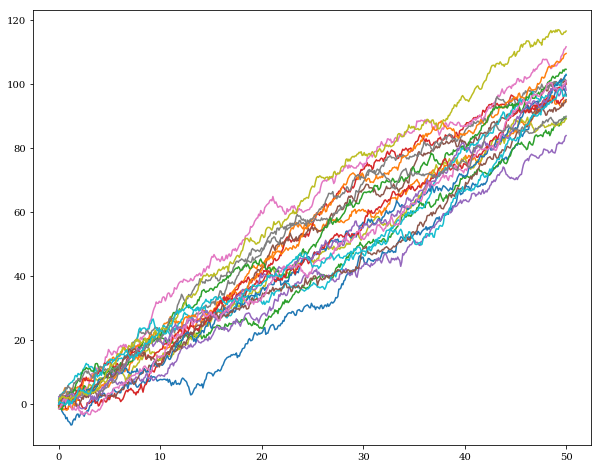

In [11]:
# Generate a set of initial positions based on the standart Gaussian distribution
npart = 100000
sigma = 1.0
x0 = np.random.normal(loc=0, scale=sigma, size=npart)

# Set parameters
T = 50.0 # Final time
nt = 500 # Number of time steps
dt = T/nt # Size of each time step
alpha = 2.0
c = 2.0 

# Position at each time step
t = np.arange(0,T+dt,dt)
x = np.empty([nt+1, npart])
x[0] = x0
for i in range(nt):
    x[i+1] = x[i]+c*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,sigma,npart)

# Plot position vs time for 20 particles
plt.figure(figsize=(10,8))
for i in range(20):
    plt.plot(t, x[:,i])

The final positions act the same way as the Brownian Motion, shifted by $cT$, as one could expect.
Let's see if that checks out:

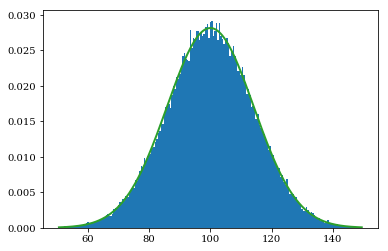

In [12]:
# Generate bins centered around cT
binwidth = 0.5
bins = np.arange(50, 150, binwidth)
bins = bins+binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot a histogram for verification 
plt.hist(x[nt], bins, normed=True)

sigmat2 = 2*alpha*T+sigma**2
plt.plot(bin_centers, np.exp(-(bin_centers-c*T)**2/(2*sigmat2))/np.sqrt(2*np.pi*sigmat2), linewidth=2, color='C2');

As expected, we have a Gaussian distribution with mean $\mu = cdT$ and variance $\sigma_t^2 = 2\alpha t + \sigma^2$

### Challenge 2
###### Simulate the random walk with a 'friction term', $dx = -\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}$ 
###### Analyse the behaviour, check that the distribution reaches a steady state for $t\rightarrow\infty$, guess the corresponding equation for the density and the analytical form of the steady state.

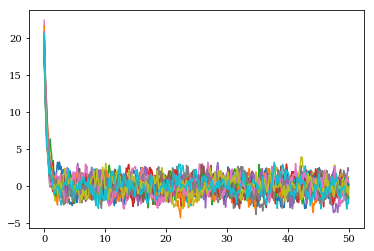

In [13]:
# Generate a set of initial positions based on Gaussian distribution, with a mean != 0
npart = 100000
sigma = 1.0
x0 = np.random.normal(loc=20, scale=sigma, size=npart)

T = 50.0
nt = 500
dt = T/nt
alpha = 2.0
gamma = 2.0

t = np.arange(0,T+dt,dt)
x = np.empty([nt+1, npart])

x[0] = x0

for i in range(nt):
    x[i+1] = x[i]-gamma*x[i]*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart)

for i in range(20):
    plt.plot(t, x[:,i])

We can see that, starting from a shifted normal distribution, the mean of the distribution goes to zero after a few time steps.

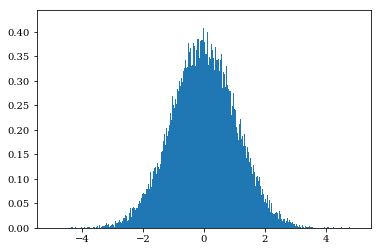

In [14]:
# Generate bins centered around 0
binwidth = 0.01
bins = np.arange(-5, 5, binwidth)
bins = bins+binwidth/2

# Plot a histogram for verification 
plt.hist(x[nt], bins, normed=True);

The final process still seem to follow a gaussian ditribution. What is its new variance?

With a bit of research, we find that the displacement equation actually represents an Ornstein–Uhlenbeck process.
Reading about this process, we understand that if the stochastic equation is $$dx = -\gamma x dt + \sqrt{2\alpha} \sqrt{dt}\cal{N(0,1)}$$
then with enough time-steps, the behaviour of the random walk will go to a Gaussian distribution, with mean $0$ and variance $\sigma_t^2 = \frac{(\sqrt{2\alpha})^2}{2\gamma} = \frac{\alpha}{\gamma}$

Does that check out?

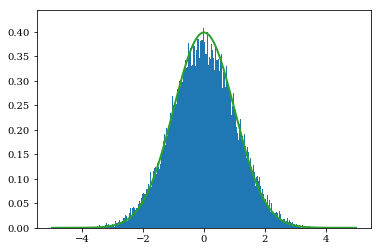

In [15]:
# Generate bins centered around 0
binwidth = 0.01
bins = np.arange(-5, 5, binwidth)
bins = bins+binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot a histogram for verification 
plt.hist(x[nt], bins, normed=True);

sigmat2 = alpha/gamma
plt.plot(bin_centers, np.exp(-bin_centers**2/(2*sigmat2))/np.sqrt(2*np.pi*sigmat2), linewidth=2, color='C2');

Here again, we get what we expected! It is obvious that for a sufficient number of time steps, the distribution reaches a steady state since its mean and variance become constant.

## Ising Model
### Challenge 1
###### Check that the Metropolis algorithm gives the correct ratio of "ups" and "downs" for different lattice configurations

Let's first implement the routines we will need

In [16]:
def energy_at_site(sp, alpha, sigma, ix, iy):
    energy = -alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx, iy]+sp[ix,(iy-1)%ny]+sp[ix, (iy+1)%ny])
    return energy

def metropolis_at_site(sp, alpha, ix, iy):
    sigma = sp[ix,iy]
    energy_before_flip = energy_at_site(sp, alpha, sigma, ix, iy)
    energy_if_site_flipped = energy_at_site(sp, alpha, -sigma, ix, iy)
    if np.random.random_sample() < np.exp(-(energy_if_site_flipped - energy_before_flip)):
        sp[ix,iy] = -sp[ix,iy]

def initial_state(nx, ny):
    # Uniform random spins between 0 and 1
    r = np.random.randint(0,2, (nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] = -1

    return r

We'll run the algorithm 50 times, and for each iteration check if we get the correct ratio

In [17]:
nx = 10
ny = 10

# Non-dimensional coupling constant J/kbT
alpha = 0.1

N = 50
res = [] # List of obtained ratios

for i in range(N):
    lat = initial_state(nx,ny)
    sigma = lat[5,5] # Spin at (5,5)
    
    # Expected ratio
    ratio_1 = np.exp((energy_at_site(lat, alpha, sigma, 5, 5)-energy_at_site(lat, alpha, -sigma, 5, 5)))
    ratio_2 = np.exp((energy_at_site(lat, alpha, -sigma, 5, 5)-energy_at_site(lat, alpha, sigma, 5, 5)))
    
    # Metropolis algorithm
    NMC = 100000
    states = np.empty(NMC+1)
    states[0] = lat[5,5]

    for n in range(0, NMC):
        metropolis_at_site(lat, alpha, 5, 5)
        states[n]=lat[5,5]
    
    ups = np.extract(states==1, states).size
    downs = NMC - ups
    
    # Keep the ratio if it is within 5% of the expected value
    ratio = ups/downs
    if np.abs(1 - ratio_1/ratio)<=0.05 or np.abs(1 - ratio_2/ratio)<=0.05:
        res.append(ratio)

# Check if the Metropolis algorithm has given the expected ratio every time
print(len(res)==N)

True


The Metropolis algorithm does give the expected ratio!

### Challenge 2
###### Perform a series of runs with $\alpha \in [0,1]$ and plot the average energy and magnetisation of the system as a function of $\alpha$. Estimate the critical value of $\alpha$ at which the phase transition occurs.

We start by implementing the routine we need:

In [18]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    states = np.empty([NMC+1, nx, ny])
    states[0]=sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0, nx*ny):
            ix = np.random.randint(0, nx)
            iy = np.random.randint(0, ny)
            metropolis_at_site(sp, alpha, ix, iy)
        states[i]=sp.copy()
    
    return states

Let's now run the algorithm for different values of $\alpha$ in the range $[0,1]$

In [19]:
nx = 100
ny = 100
NMC = 100

alphas = np.arange(0, 1, 0.05)

states = []
for alpha in alphas:
    sp = np.ones([nx, ny])
    states.append(ising_model_metropolis(sp, NMC, nx, ny, alpha))


We'll need a routine for the average energy:

In [20]:
def average_energy(sp, alpha, nx, ny):
    """ Calculates the average energy of a given state
    Parameters:
    ----------
    sp   : lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    average_energy : float
        average energy of the lattice state
    """
    
    total_energy = 0
    for ix in range(nx):
        for iy in range(ny):
            sigma = sp[ix, iy]
            total_energy = total_energy + energy_at_site(sp, alpha, sigma, ix, iy)
    average_energy = total_energy/(nx*ny)
    return average_energy

As well as for the magnetization:

In [21]:
def magnetization(sp, nx, ny):
    """ Calculates the magnetization of a given state
    Parameters:
    ----------
    sp   : lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    Returns:
    -------
    magn : float
        magnetization of the lattice state
    """
    
    magn = 0
    for ix in range(nx):
        for iy in range(ny):
            magn = magn + sp[ix, iy]
    return magn

We can now calculate those values for each $\alpha$ and make the plots.

In [22]:
avg_energy = []
magnet = []

for i in range(len(states)):
    avg_energy.append(average_energy(states[i][NMC], alphas[i], nx, ny))
    magnet.append(magnetization(states[i][NMC], nx, ny))

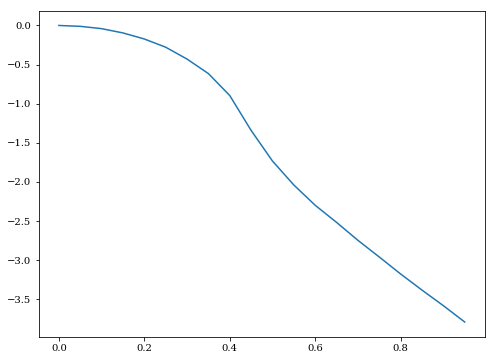

In [23]:
plt.figure(figsize=(8,6))
plt.plot(alphas, avg_energy)

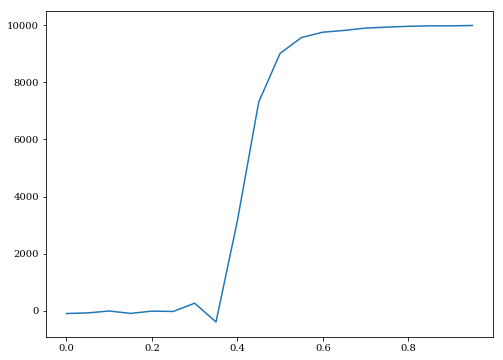

In [24]:
plt.figure(figsize=(8,6))
plt.plot(alphas, magnet)

We can see in both plots that the phase transition occurs for a value of $\alpha$ somewhere in between $0,4$ and $0,45$ - a higher precision is hard to reach with the method we used here because of runtime. 

However, the exact Onsager solution for the two-dimensional square-lattice Ising model is $\alpha = \frac{\ln{(1+\sqrt{2})}}{2}\approx 0,440687$, which makes our estimation pretty satisfying.


### Challenge 3
###### Redo the analysis with a different set of boundary conditions for the lattice and a different initial lattice configuration

As suggested, let's implement a lattice configuration where all spins are pointing upwards on the borders while they are randomly oriented in the bulk

In [25]:
def initial_state(nx, ny):
    """ Creates a lattice with random spin orientations in the bulk
        and upwards pointing spin on the borders
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
    
    # Uniform random spins between 0 and 1  
    r = np.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1
    
    # On the borders, we assign a positive spin
    r[0, :] = 1
    r[-1, :] = 1
    r[:, 0] = 1
    r[:, -1] = 1

    return r

Let's see if that works as it should!

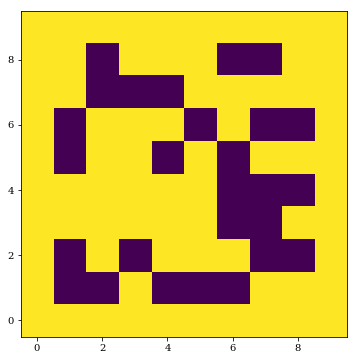

In [26]:
sp = initial_state(10,10)
plt.figure(figsize=(6,6))
plt.imshow(sp,interpolation="none",origin='lower');

It does! Let us now redo the analysis with this initial configuration:

In [27]:
nx = 100
ny = 100
NMC = 100

alphas = np.arange(0, 1, 0.05)

states = []
for alpha in alphas:
    sp = np.ones([nx, ny])
    states.append(ising_model_metropolis(sp, NMC, nx, ny, alpha))


In [28]:
avg_energy = []
magnet = []

for i in range(len(states)):
    avg_energy.append(average_energy(states[i][NMC], alphas[i], nx, ny))
    magnet.append(magnetization(states[i][NMC], nx, ny))

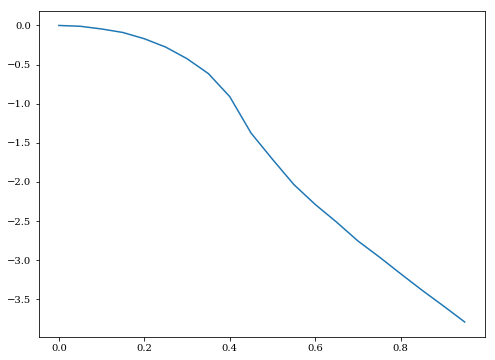

In [29]:
plt.figure(figsize=(8,6))
plt.plot(alphas, avg_energy)

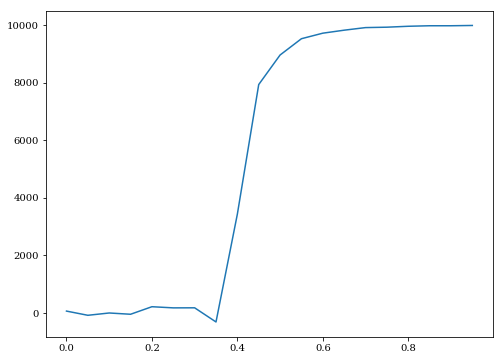

In [30]:
plt.figure(figsize=(8,6))
plt.plot(alphas, magnet)

As one would expect, the phase transition appears to occur at the same critical value for $\alpha$ as in the randomly distributed initial configuration!